# Week 7 handin

# Assignment chosen: 

## Python Exercise 07

### Exercise 1
1. Go to this website: https://www.komplett.dk/category/21640/gaming/spiludstyr/gaming-headset?nlevel=10431%C2%A721603%C2%A721640&sort=OrderedTimes_bf%3ADESCENDING&hits=192
2. Use BeautifulSoup, to select the name, price, amount of stars (review related) and amount in stock.
3. Save the data, to be used for later.

### Exercise 2
1. Using Regular Expressions and the data from exercise 1, find all headset which is in stock.
2. Create a list of tuples with the data from subtask 1.

### Exercise 3
1. Use the data from Exercise 2, to make a sorted bar chart of the headsets, where x-axis is names, and y-axis is price.

### Made by NewBiz (Class: D):
- Nicklas Nielsen (cph-nn161@cphbusiness.dk)
- Mathias Haugaard (cph-mn556@cphbusiness.dk)
- Nikolaj Larsen (cph-nl174@cphbusiness.dk)

### Link
https://github.com/nicklasanielsen/Python_Exercise7

## Status
I have completed all exercises.

# Exercise 1
### 1 - 3

## RUN THIS CELL TO GET MODULE NEEDED WHEN ON MYBINDER
Apparently regex module wasn't needed, so only bs4 has to be installed.

In [ ]:
pip install bs4

In [6]:
import requests, bs4, re

# 1
url = "https://www.komplett.dk/category/21640/gaming/spiludstyr/gaming-headset?nlevel=10431%C2%A721603%C2%A721640&sort=OrderedTimes_bf%3ADESCENDING&hits=192"

# 2
res = requests.get(url)
if res.ok:
    soup = bs4.BeautifulSoup(res.text, "html.parser")
    products = soup.select("div[class=product-list-item]")

print(products[0])

<div class="product-list-item" data-lazy-viewmodel="Components/ProductListItems/ProductListItemViewModel">
<a class="product-link image-container" href="/product/1104426/gaming/spiludstyr/gaming-headset/razer-nari-ultimate-gaming-headset" tabindex="-1" title="Razer Nari Ultimate Gaming Headset">
<div class="image-wrapper">
<img alt="Razer Nari Ultimate Gaming Headset Gaming headset" class="product-image" src="/img/p/200/1104426.jpg" title="Razer Nari Ultimate Gaming Headset Gaming headset"/>
</div>
<div class="discount-bubble image-discount-bubble">
<span class="discount-label">-49%</span>
</div>
</a>
<div class="content-block">
<div class="text-container">
<a class="product-link" href="/product/1104426/gaming/spiludstyr/gaming-headset/razer-nari-ultimate-gaming-headset">
<div class="text-content">
<h2>Razer Nari Ultimate Gaming Headset</h2>
<p>trådlös, usb, indrag mic, brusreducerad, glasögonvänlig, hypersense pc, ps4, thx</p>
</div>
</a>
<a class="product-link" href="/product/1104426

# Exercise 2
### 1 - 2

In [4]:
# 1
status_reg = re.compile(r'Ikke på lager.')
price_reg = re.compile(r'\d{3},-|[0-9].\d{3},-')
not_in_stock = 0
products_in_stock = []

for p in products:
    text = p.getText()
    price = price_reg.search(text).group()
    check = status_reg.search(text)
    if check != None: # None means there isn't a match, as in the text does not have "Ikke på lager", therefore in stock.
        not_in_stock += 1
    else:
        numbers = "0123456789"
        for char in price:
            if char not in numbers:
                price = price.replace(char, "")
        products_in_stock.append((p.findChildren("h2")[0].getText(), int(price)))

print("Total number of headsets:", len(products))
print("Number of headsets not in stock:", not_in_stock)
print("Number of headsets in stock:", len(products) - not_in_stock)
print("\nNames and prices of headsets in stock:\n")

# 2
for product in products_in_stock:
    print(product)

Total number of headsets: 192
Number of headsets not in stock: 50
Number of headsets in stock: 142

Names and prices of headsets in stock:

('Razer Nari Ultimate Gaming Headset', 1579)
('HyperX Cloud Flight S Trådløs Gaming Headset', 997)
('HyperX Cloud II Trådløs gaming headset', 1299)
('Steelseries Arctis Pro Headset + GameDAC', 2099)
('Logitech G935 Trådløs Gaming Headset', 1197)
('HyperX Cloud II Gaming Headset Sort/ Rød', 599)
('Razer BlackShark V2 Pro trådløs gaming headset', 1490)
('Steelseries Arctis 7 Trådløs 2019 Sort', 1299)
('Steelseries Arctis 5 Headset Sort 2019', 799)
('HyperX Cloud II Gaming Headset Gun Metal', 599)
('HyperX Cloud Flight Trådløs Headset', 1049)
('Razer Nari Essential Gaming Headset', 799)
('HyperX Cloud Stinger Core Wireless (PlayStation)', 599)
('EPOS Sennheiser GAME ZERO Gaming Headset Sort', 1199)
('Roccat ELO 7.1 AIR trådløs gaming headset', 799)
('Corsair Gaming HS60 Pro Surround Headset Carbon', 549)
('HyperX Cloud Alpha Pro Gaming Headset', 799)


# Exercise 3
### 1

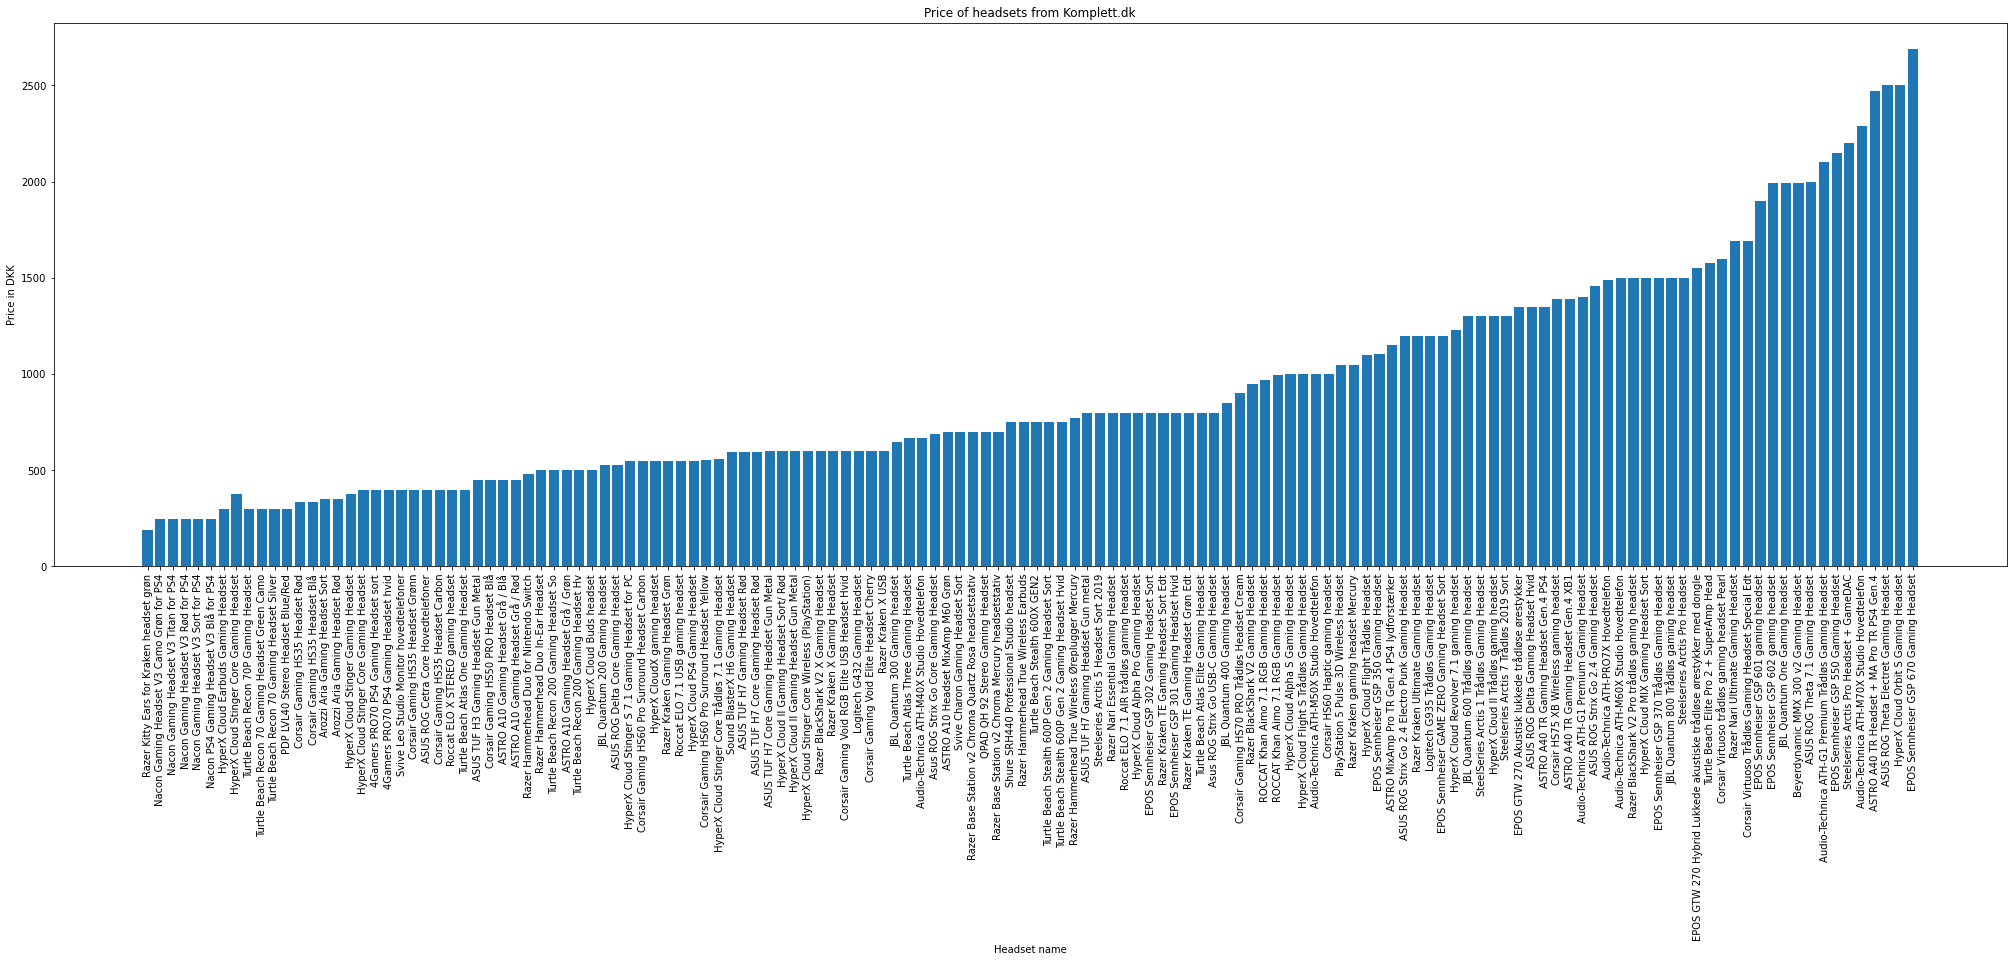

In [5]:
import matplotlib.pyplot as plt 

names = []
prices = []

def sort_by_price(e):
    return e[1]

products_in_stock.sort(key=sort_by_price)

for product in products_in_stock:
    names.append(product[0])
    prices.append(product[1])

fig, ax1 = plt.subplots(1, figsize=(35, 10))
ax1.bar(names, prices)
ax1.set_title("Price of headsets from Komplett.dk")
ax1.set_xticklabels(names, rotation=90)
ax1.set_xlabel("Headset name")
ax1.set_ylabel("Price in DKK")
plt.show()

